## 下單

In [72]:
import requests
import json
import time
import hmac
import hashlib
from collections import OrderedDict

api_key = "H629C05WsQ0YypGcRi"
api_secret = "PI7Yh2X9oL3389UjoplzRVEGAOTRDLeAFFlg"

url = "https://api-demo.bybit.com/v5/order/create"

# 用 OrderedDict 確保 key 順序不變
payload = OrderedDict([
    ("category", "linear"),
    ("symbol", "BTCUSDT"),
    ("side", "Buy"),
    ("orderType", "Limit"),
    ("price", "110000"),
    ("qty", "0.001"),
    ("timeInForce", "GTC"),
    ("reduceOnly", False),
    ("closeOnTrigger", False)
])

# 簽名產生函數
def generate_signature(api_key, api_secret, timestamp, recv_window, body_dict):
    body_str = json.dumps(body_dict, separators=(",", ":"))  # 無空白
    origin_str = f"{timestamp}{api_key}{recv_window}{body_str}"
    signature = hmac.new(
        api_secret.encode("utf-8"),
        origin_str.encode("utf-8"),
        hashlib.sha256
    ).hexdigest()
    return signature, body_str  # 回傳 body_str 用來送出

timestamp = str(int(time.time() * 1000))
recv_window = "50000"
signature, body_str = generate_signature(api_key, api_secret, timestamp, recv_window, payload)

headers = {
    "X-BAPI-SIGN-TYPE": "2",
    "X-BAPI-API-KEY": api_key,
    "X-BAPI-SIGN": signature,
    "X-BAPI-TIMESTAMP": timestamp,
    "X-BAPI-RECV-WINDOW": recv_window,
    "Content-Type": "application/json"
}

# 用預先處理過的 body_str，避免 json.dumps 造成不一致
response = requests.post(url, headers=headers, data=body_str)

print("Status Code:", response.status_code)
print("Response:", response.json())


Status Code: 200
Response: {'retCode': 0, 'retMsg': 'OK', 'result': {'orderId': '94d7e889-17eb-41d7-be77-8c7f7cac03ff', 'orderLinkId': ''}, 'retExtInfo': {}, 'time': 1754218947199}


## 確認倉位

In [ ]:
import requests
import time
import hashlib
import hmac
import urllib.parse

api_key = "H629C05WsQ0YypGcRi"
api_secret = "PI7Yh2X9oL3389UjoplzRVEGAOTRDLeAFFlg"

url = "https://api-demo.bybit.com/v5/position/list"

# Query parameters（這會成為 query string）
params = {
    "category": "linear",
    "symbol": "BTCUSDT"
}

# 轉為排序好的 query string（Bybit 要求排序過的）
query_string = "&".join(f"{k}={v}" for k, v in sorted(params.items()))
recv_window = "50000"
timestamp = str(int(time.time() * 1000))

# 建立簽名字串
origin_string = timestamp + api_key + recv_window + query_string
signature = hmac.new(
    api_secret.encode("utf-8"),
    origin_string.encode("utf-8"),
    hashlib.sha256
).hexdigest()

# 設定 headers
headers = {
    "X-BAPI-SIGN-TYPE": "2",
    "X-BAPI-API-KEY": api_key,
    "X-BAPI-SIGN": signature,
    "X-BAPI-TIMESTAMP": timestamp,
    "X-BAPI-RECV-WINDOW": recv_window
}

# 發送請求
response = requests.get(url, headers=headers, params=params)

# 輸出
print("Status Code:", response.status_code)
print("Response:", response.json())

# response.json()["result"]["list"][0]["side"] -> Buy



Status Code: 200
Response: {'retCode': 0, 'retMsg': 'OK', 'result': {'nextPageCursor': 'BTCUSDT%2C1754219646237%2C0', 'category': 'linear', 'list': [{'symbol': 'BTCUSDT', 'leverage': '100', 'autoAddMargin': 0, 'avgPrice': '114157.4', 'liqPrice': '', 'riskLimitValue': '2000000', 'takeProfit': '', 'positionValue': '11415.74', 'isReduceOnly': False, 'tpslMode': 'Full', 'riskId': 1, 'trailingStop': '0', 'unrealisedPnl': '-4.17', 'markPrice': '114115.7', 'adlRankIndicator': 2, 'cumRealisedPnl': '14704.86490157', 'positionMM': '63.29457043', 'createdTime': '1747540863971', 'positionIdx': 0, 'positionIM': '120.37327043', 'seq': 140710408408655, 'updatedTime': '1754219646237', 'side': 'Buy', 'bustPrice': '', 'positionBalance': '0', 'leverageSysUpdatedTime': '', 'curRealisedPnl': '-2.283148', 'size': '0.1', 'positionStatus': 'Normal', 'mmrSysUpdatedTime': '', 'stopLoss': '', 'tradeMode': 0, 'sessionAvgPrice': ''}]}, 'retExtInfo': {}, 'time': 1754220174971}


## 平倉

In [ ]:
import requests
import json
import time
import hmac
import hashlib
from collections import OrderedDict

api_key = "H629C05WsQ0YypGcRi"
api_secret = "PI7Yh2X9oL3389UjoplzRVEGAOTRDLeAFFlg"

url = "https://api-demo.bybit.com/v5/order/create"

payload = OrderedDict([
    ("category", "linear"),
    ("symbol", "BTCUSDT"),
    ("side", "Sell"),  # 相反方向來平倉
    ("orderType", "Market"),
    ("qty", "0.1"),
    ("timeInForce", "IOC"),  # 市價單時，建議 IOC
    ("reduceOnly", True),
    ("closeOnTrigger", False)
])

def generate_signature(api_key, api_secret, timestamp, recv_window, body_dict):
    body_str = json.dumps(body_dict, separators=(",", ":"))
    origin_str = f"{timestamp}{api_key}{recv_window}{body_str}"
    sign = hmac.new(api_secret.encode(), origin_str.encode(), hashlib.sha256).hexdigest()
    return sign, body_str

timestamp = str(int(time.time() * 1000))
recv_window = "50000"
signature, body_str = generate_signature(api_key, api_secret, timestamp, recv_window, payload)

headers = {
    "X-BAPI-SIGN-TYPE": "2",
    "X-BAPI-API-KEY": api_key,
    "X-BAPI-SIGN": signature,
    "X-BAPI-TIMESTAMP": timestamp,
    "X-BAPI-RECV-WINDOW": recv_window,
    "Content-Type": "application/json"
}

response = requests.post(url, headers=headers, data=body_str)
print("Status:", response.status_code)
print("Response:", response.json())


Status: 200
Response: {'retCode': 0, 'retMsg': 'OK', 'result': {'orderId': 'adf533c7-96e7-40ab-8100-0ccb7cc0a6d4', 'orderLinkId': ''}, 'retExtInfo': {}, 'time': 1754222058055}


In [1]:
import json
import requests
import time
from datetime import datetime, timezone, timedelta
from dateutil.relativedelta import relativedelta
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from talib import abstract
import scipy.stats

# Modulize

## Strategy

In [3]:
class Strategy:
    def __init__(self, strategy_name):
        self.strategy_name = strategy_name

    
    def _run(self, df, column, window, threshold):
        if self.strategy_name == "bb":
            df = self.bollinger_bands(df, column, window, threshold)
            df = self.bollinger_band_entry_logic(df, column)

        elif self.strategy_name == "ma_cross":
            # df = self.z_score(df, column, window)
            df = self.ma_crossover_entry_logic(df, column, window, threshold)
        

        elif self.strategy_name == "trend":
            df = self.z_score(df, column, window)
            # df = self.min_max_norm(df, column, window)
            # df = self.rsi(df, column, window)
            df = self.trend(df, threshold)

        elif self.strategy_name == "trend_re":
            df = self.z_score(df, column, window)
            # df = self.min_max_norm(df, column, window)
            # df = self.rsi(df, column, window)
            df = self.trend_reverse(df, threshold)

        elif self.strategy_name == "mean_r":
            df = self.z_score(df, column, window)
            # df = self.min_max_norm(df, column, window)
            # df = self.rsi(df, column, window)
            df = self.mean_reversion(df, threshold)

        elif self.strategy_name == "mean_rr":
            df = self.z_score(df, column, window)
            # df = self.min_max_norm(df, column, window)
            df = self.mean_reversion_re(df, threshold)

        return df

    
    def bollinger_bands(self, df, column, window, threshold):
        df["BB_Middle"] = df[column].rolling(window=window).mean()
        df["BB_Upper"] = df["BB_Middle"] + (df[column].rolling(window=window).std() * threshold)
        df["BB_Lower"] = df["BB_Middle"] - (df[column].rolling(window=window).std() * threshold)

        return df
    

    def bollinger_band_entry_logic(self, df, column):
        df["Signal"] = 0
        df.loc[df[column] < df["BB_Lower"], "Signal"] = 1
        df.loc[df[column] > df["BB_Upper"], "Signal"] = -1
        df["Signal"] = df["Signal"].replace(0, np.nan).ffill().fillna(0)
        df["position"] = df["Signal"].shift(1)  # Use previous signal as active position

        return df
    

    def ma_crossover_entry_logic(self, df, column, window, threshold):
        df["MA"] = df[column].rolling(window=window).mean()
        df["MA_Upper"] = df["MA"] * (1 + threshold)
        df["MA_Lower"] = df["MA"] * (1 - threshold)

        df["Signal"] = 0

        df.loc[
            (df[column].shift(1) < df["MA_Upper"].shift(1)) &
            (df[column] >= df["MA_Upper"]),
            "Signal"
        ] = -1

        df.loc[
            (df[column].shift(1) > df["MA_Lower"].shift(1)) &
            (df[column] <= df["MA_Lower"]),
            "Signal"
        ] = 1

        df["Signal"] = df["Signal"].replace(0, np.nan).ffill().fillna(0)
        df["position"] = df["Signal"].shift(1)

        return df
    

    def z_score(self, df, column, window):
        df["mean"] = df[column].rolling(window=window).mean()
        df["std"] = df[column].rolling(window=window).std()
        df["factor"] = (df[column] - df["mean"]) / df["std"]

        return df


    def min_max_norm(self, df, column, window):
        df["max"] = df[column].rolling(window=window).max()
        df["min"] = df[column].rolling(window=window).min()
        df["factor"] = ((df[column] - df["min"]) / (df["max"] - df["min"]))

        return df
    

    def rsi(self, df, column, window):
        delta = df[column].diff()

        gain = delta.clip(lower=0)
        loss = -delta.clip(upper=0)

        avg_gain = gain.rolling(window=window).mean()
        avg_loss = loss.rolling(window=window).mean()

        rs = avg_gain / avg_loss
        df["factor"] = 100 - (100 / (1 + rs))

        return df


    def trend(self, df, threshold):
        df["Signal"] = 0
        df.loc[df["factor"] >= threshold, "Signal"] = 1
        df.loc[df["factor"] <= -threshold, "Signal"] = -1
        df["Signal"] = df["Signal"].replace(0, np.nan).ffill().fillna(0)
        df["position"] = df["Signal"].shift(1)  # Use previous signal as active position

        return df
    

    def trend_reverse(self, df, threshold):
        df["Signal"] = 0
        df.loc[df["factor"] >= threshold, "Signal"] = -1
        df.loc[df["factor"] <= -threshold, "Signal"] = 1

        # df.loc[df["factor"].abs() < 0.2, "Signal"] = 0

        df["Signal"] = df["Signal"].replace(0, np.nan).fillna(0)
        df["position"] = df["Signal"].shift(1)  # Use previous signal as active position

        return df
    

    def mean_reversion(self, df, threshold):
        factor = df["factor"].values
        position = np.zeros(len(df), dtype=int)

        for i in range(1, len(df)):
            sig = factor[i]
            prev_position = position[i-1]

            if sig >= threshold:
                position[i] = 1
            elif sig <= threshold:
                position[i] = -1
            elif (sig <= 0 and prev_position == 1) or (sig >= 0 and prev_position == -1):
                position[i] = 0
            else:
                position[i] = prev_position

        df["Signal"] = position
        df["position"] = df["Signal"].shift(1)  # Use previous signal as active position
        return df
    

    def mean_reversion_re(self, df, threshold):
        factor = df["factor"].values
        position = np.zeros(len(df), dtype=int)

        for i in range(1, len(df)):
            sig = factor[i]
            prev_position = position[i-1]

            if sig >= threshold:
                position[i] = -1
            elif sig <= threshold:
                position[i] = 1
            elif (sig <= 0 and prev_position == -1) or (sig >= 0 and prev_position == 1):
                position[i] = 0
            else:
                position[i] = prev_position

        df["Signal"] = position
        df["position"] = df["Signal"].shift(1)  # Use previous signal as active position
        return df


## Evaluate Performance

In [4]:
def evaluate_performance(df, data_interval_str="1d", trading_fee=0.0004):
    returns = df["pnl"].dropna()
    balance_series = df["cumu_pnl"].dropna()
    trades = df["Signal"].diff().abs()
    trade_count = int((trades > 0).sum())
    trading_fee = trading_fee
    fees_paid = (df["trade"] * trading_fee).sum()

    interval_map = {
        "1m": 1, "3m": 3, "5m": 5, "15m": 15, "30m": 30,
        "1h": 60, "2h": 120, "4h": 240, "6h": 360, "12h": 720,
        "1d": 1440, "1w": 10080, "1M": 43200
    }

    data_interval = interval_map.get(data_interval_str, 1440)

    annual_factor = 365 * 24 * 60 / data_interval

    total_return = balance_series.iloc[-1]
    avg_return = returns.mean()
    std_dev = returns.std()
    std_dev_annualised = std_dev * np.sqrt(annual_factor)
    sharpe = (avg_return / std_dev) * np.sqrt(annual_factor) if std_dev != 0 else 0

    downside_returns = returns[returns < 0]
    sortino = (avg_return / downside_returns.std()) * np.sqrt(annual_factor) if downside_returns.std() != 0 else 0

    running_max = balance_series.cummax()
    drawdown = balance_series - running_max
    max_dd = drawdown.min()
    calmar = total_return / abs(max_dd) if max_dd != 0 else np.nan

    dd_end = drawdown.idxmin()
    dd_start = balance_series[:dd_end].idxmax()
    dd_duration = dd_end - dd_start
    dd_days = dd_duration.days
    dd_hours = dd_duration.seconds // 3600
    dd_minutes = (dd_duration.seconds % 3600) // 60
    dd_duration_str = f"{int(dd_days)}d {int(dd_hours)}h {int(dd_minutes)}m"

    fee_ratio = fees_paid / total_return if total_return != 0 else np.nan

    position_change = df["Signal"].diff().fillna(0) != 0
    holding_periods = df.groupby(position_change.cumsum()).size()
    median_holding = holding_periods.median()

    metrics = {
        "Total Return": total_return,
        "Avg Return per Interval": avg_return,
        "Std Dev": std_dev_annualised,
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Calmar Ratio": calmar,
        "Profit Factor": returns[returns > 0].sum() / abs(returns[returns < 0].sum()),
        "Max Drawdown (Abs)": max_dd,
        "Max Drawdown Period": f"{dd_duration} bars ({dd_duration_str})",
        "Trade Count": trade_count,
        "Trading Fees": trading_fee,
        "Fees Paid": fees_paid,
        "Fees / PnL Ratio": fee_ratio,
        "Median Holding Period (bars)": median_holding
    }

    return metrics

## Normal Backtest

In [7]:
def normal_backtest(
        df,
        strategy_name,
        lookback,
        threshold,
        column="close",
        data_interval_str="1h",
        trading_fees=0.0004
    ):
    
    strategy = Strategy(strategy_name)
    df = strategy._run(df.copy(), column=column, window=lookback, threshold=threshold)

    # max_hold_bars = 24
    # position = df["position"].copy().values
    # hold = 0
    # for i in range(1, len(position)):
    #     if position[i] != 0:
    #         hold += 1
    #         if hold >= max_hold_bars:
    #             position[i] = 0
    #             hold = 0
    #     else:
    #         hold = 0
    # df["position"] = position

    df["price_chg"] = df["close"].pct_change()
    df["trade"] = df["position"].diff().abs().fillna(0)

    # Apply fees only when there's a position change
    df["pnl"] = df["position"] * df["price_chg"] - df["trade"] * trading_fees
    df["cumu_pnl"] = df["pnl"].cumsum()

    # Plot PnL & Price
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(df.index, df["cumu_pnl"], label="Cumulative PnL", color="blue")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Cumulative PnL", color="blue")
    ax2 = ax1.twinx()
    ax2.plot(df.index, df["close"], label="Close Price", color="red", alpha=0.7)
    ax2.set_ylabel("Close Price", color="red")
    fig.suptitle("Cumulative PnL & Close Price Over Time")
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
    plt.show()

    # Generate Performance Report
    metrics = evaluate_performance(df, data_interval_str=data_interval_str, trading_fee=trading_fees)
    print(f"Param Setting -- Best Lookback: {lookback}, Best Std Dev: {threshold}\n")

    print("=== Normal Backtest Report ===")
    print("Pair: BTCUSDT\n")
    print("Performance Metrics:")
    for k, v in metrics.items():
        if isinstance(v, float):
            print(f"{k:<30}: {v:.4f}")
        else:
            print(f"{k:<30}: {v}")

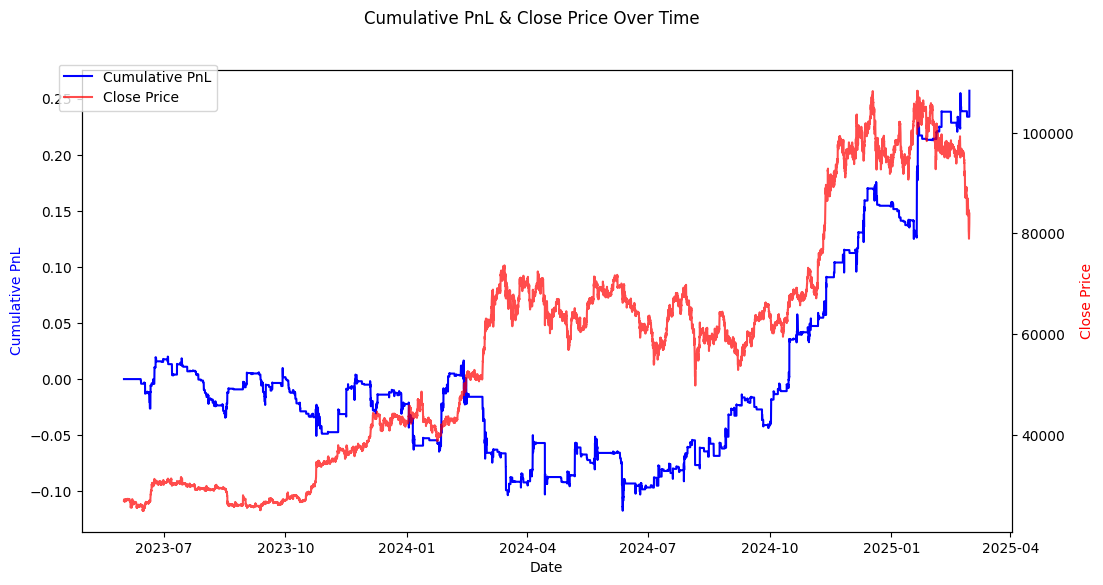

Param Setting -- Best Lookback: 249, Best Std Dev: 2.073

=== Normal Backtest Report ===
Pair: BTCUSDT

Performance Metrics:
Total Return                  : 0.2571
Avg Return per Interval       : 0.0000
Std Dev                       : 0.1416
Sharpe Ratio                  : 1.0369
Sortino Ratio                 : 0.4967
Calmar Ratio                  : 1.8709
Profit Factor                 : 1.1345
Max Drawdown (Abs)            : -0.1374
Max Drawdown Period           : 343 days 19:00:00 bars (343d 19h 0m)
Trade Count                   : 1171
Trading Fees                  : 0.0004
Fees Paid                     : 0.4692
Fees / PnL Ratio              : 1.8251
Median Holding Period (bars)  : 2.0000


In [12]:
btc_path = r"C:\Users\cool6\phase2_practice\kline_BTC_1h.csv"
prem_path = r"C:\Users\cool6\phase2_practice\premium_index_BTC_1h.csv"

btc_df = pd.read_csv(btc_path, encoding="utf-8-sig")
prem_df = pd.read_csv(prem_path, encoding="utf-8-sig")

df = pd.merge(btc_df, prem_df, how="outer", on="time")
df["time"] = pd.to_datetime(df["time"])
df.set_index("time", inplace=True)

df = df[26280: ]

normal_backtest(
    df,
    strategy_name="trend_re",
    lookback=249,
    threshold=2.073,
    column="premium_index_close",
    data_interval_str="1h",
    trading_fees=0.0004
)

## Tuning - Profit Factor

In [5]:
def optimise_param_pf(
        df,
        strategy_name,
        lookback_end,
        lookback_step,
        threshold_end,
        threshold_step,
        lookback_start=1,
        threshold_start=1,
        column="close",
        data_interval_str="1h",
        trading_fees=0.0004
    ):

    strategy = Strategy(strategy_name)

    best_pf, best_lookback, best_threshold = 0, -1, -1

    interval_map = {
        "1m": 1, "3m": 3, "5m": 5, "15m": 15, "30m": 30,
        "1h": 60, "2h": 120, "4h": 240, "6h": 360, "12h": 720,
        "1d": 1440, "1w": 10080, "1M": 43200
    }

    data_interval = interval_map.get(data_interval_str, 1440)
    annual_factor = 365 * 24 * 60 / data_interval

    heatmap_data = []

    for lookback in np.arange(lookback_start, lookback_end, lookback_step):
        for threshold in np.arange(threshold_start, threshold_end, threshold_step):
            temp_df = strategy._run(df.copy(), column=column, window=lookback, threshold=threshold)


            # max_hold_bars = 12
            # position = temp_df["position"].copy().values
            # hold = 0
            # for i in range(1, len(position)):
            #     if position[i] != 0:
            #         hold += 1
            #         if hold >= max_hold_bars:
            #             position[i] = 0
            #             hold = 0
            #     else:
            #         hold = 0
            # temp_df["position"] = position

            temp_df["price_chg"] = temp_df["close"].pct_change()
            temp_df["trade"] = temp_df["position"].diff().abs().fillna(0)
            temp_df["pnl"] = temp_df["position"] * temp_df["price_chg"] - temp_df["trade"] * trading_fees

            sr = temp_df["pnl"].mean() / temp_df["pnl"].std() * math.sqrt(annual_factor)
            heatmap_data.append([lookback, threshold, sr.item()])

            active_ratio = (temp_df["position"] != 0).sum() / len(temp_df)
            if active_ratio < 0.03:
                continue

            pf_numerator = temp_df["pnl"][temp_df["pnl"] > 0].sum()
            pf_denominator = abs(temp_df["pnl"][temp_df["pnl"] < 0].sum())
            pf = pf_numerator / pf_denominator if pf_denominator != 0 else 0

            if pf > best_pf:
                best_pf, best_lookback, best_threshold = pf, lookback, threshold

    # heatmap
    heatmap_df = pd.DataFrame(
        columns=["window", "threshold", "SR"],
        data=heatmap_data
    ).pivot(index=["window"], columns="threshold", values="SR")

    plt.figure(figsize=(16, 12))
    seaborn.heatmap(heatmap_df, annot=True, cmap="RdYlGn")

    
    # Re-run strategy with optimal params
    df = strategy._run(df.copy(), column=column, window=best_lookback, threshold=best_threshold)

    df["price_chg"] = df["close"].pct_change()
    df["trade"] = df["position"].diff().abs().fillna(0)

    # Apply fees only when there's a position change
    df["pnl"] = df["position"] * df["price_chg"] - df["trade"] * trading_fees
    df["cumu_pnl"] = df["pnl"].cumsum()
    

    # === Plot Pnl ===
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(df.index, df["cumu_pnl"], label="Cumulative PnL", color="blue")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Cumulative PnL", color="blue")
    ax2 = ax1.twinx()
    ax2.plot(df.index, df["close"], label="Close Price", color="red", alpha=0.7)
    ax2.set_ylabel("Close Price", color="red")
    fig.suptitle("Cumulative PnL & Close Price Over Time")
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
    plt.show()


    # === Metrics Report with fees ===
    metrics = evaluate_performance(df, data_interval_str=data_interval_str, trading_fee=trading_fees)

    print(f"Optimised Param -- Best Lookback: {best_lookback}, Best Std Dev: {best_threshold}, Best Profit Factor: {best_pf}")
    print("=== Profit Factor Optimised Backtest Report ===")
    print("Pair: BTCUSDT\n")
    print("Performance Metrics")
    for k, v in metrics.items():
        if isinstance(v, float):
            print(f"{k:<30}: {v:.4f}")
        else:
            print(f"{k:<30}: {v}")


### 1 hour

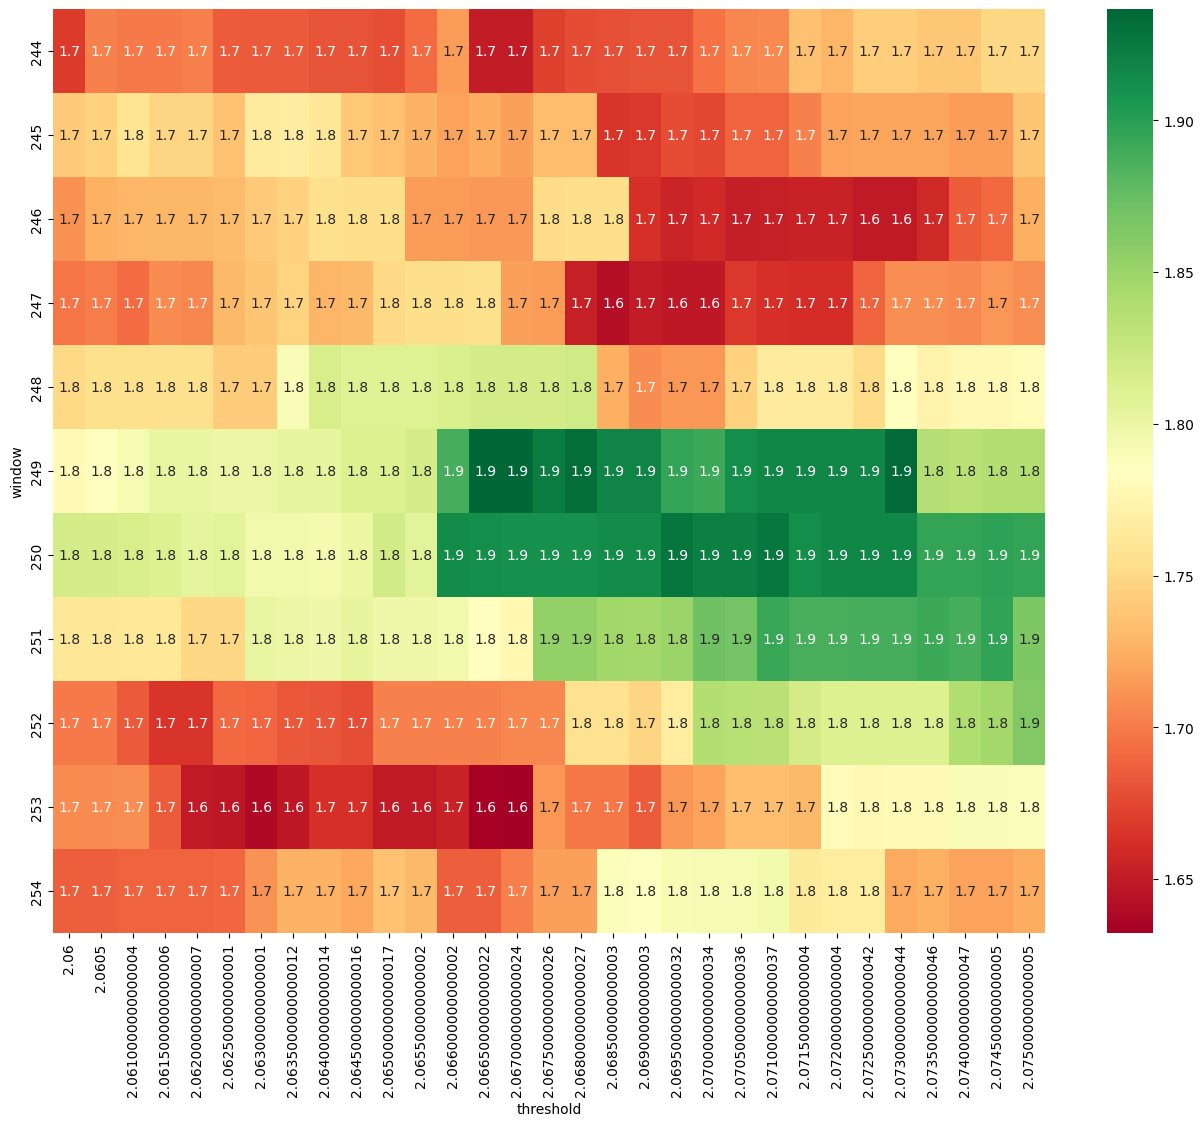

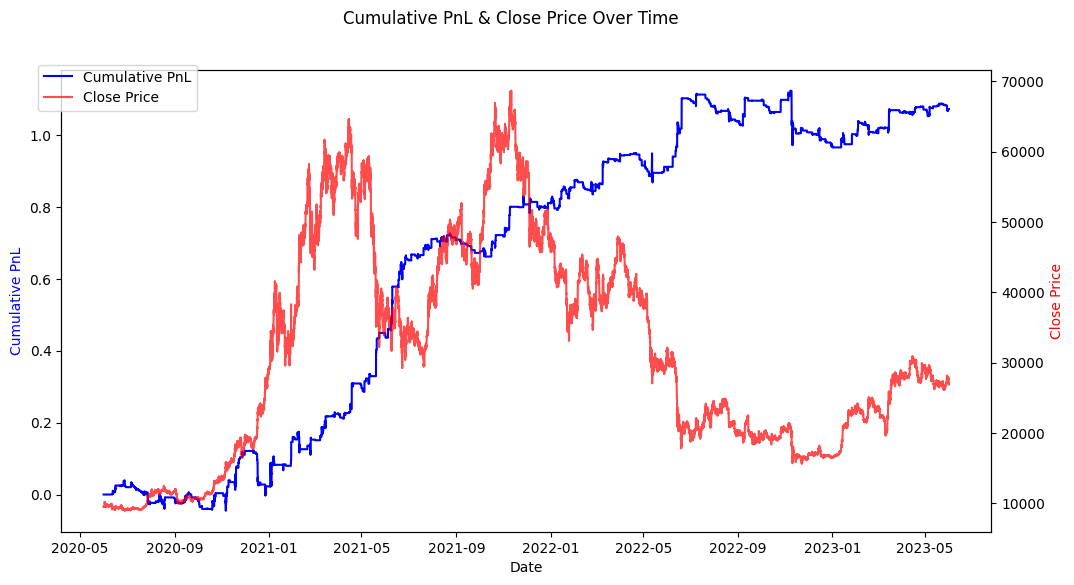

Optimised Param -- Best Lookback: 249, Best Std Dev: 2.0730000000000044, Best Profit Factor: 1.3359589580363325
=== Profit Factor Optimised Backtest Report ===
Pair: BTCUSDT

Performance Metrics
Total Return                  : 1.0719
Avg Return per Interval       : 0.0000
Std Dev                       : 0.1846
Sharpe Ratio                  : 1.9355
Sortino Ratio                 : 0.9669
Calmar Ratio                  : 6.7953
Profit Factor                 : 1.3360
Max Drawdown (Abs)            : -0.1577
Max Drawdown Period           : 55 days 05:00:00 bars (55d 5h 0m)
Trade Count                   : 1735
Trading Fees                  : 0.0004
Fees Paid                     : 0.6952
Fees / PnL Ratio              : 0.6486
Median Holding Period (bars)  : 2.0000


'\ntrend_re, Lookback: 57, Best Std Dev: 2.08\n\nPerformance Metrics\nTotal Return                  : 5.4914\nAvg Return per Interval       : 0.0001\nStd Dev                       : 0.6134\nSharpe Ratio                  : 1.8846\nSortino Ratio                 : 2.4463\nCalmar Ratio                  : 9.8391\nProfit Factor                 : 1.0674\nMax Drawdown (Abs)            : -0.5581\nMax Drawdown Period           : 269 days 19:00:00 bars (269d 19h 0m)\nTrade Count                   : 609\nTrading Fees                  : 0.0004\nFees Paid                     : 0.4868\nFees / PnL Ratio              : 0.0886\nMedian Holding Period (bars)  : 52.5000\n'

In [ ]:
# new path: C:\Users\cool6\crypto_data\kline_BTC_1h.csv

btc_path = r"C:\Users\cool6\phase2_practice\kline_BTC_1h.csv"
prem_path = r"C:\Users\cool6\phase2_practice\premium_index_BTC_1h.csv"

btc_df = pd.read_csv(btc_path, encoding="utf-8-sig")
prem_df = pd.read_csv(prem_path, encoding="utf-8-sig")

df = pd.merge(btc_df, prem_df, how="outer", on="time")
df["time"] = pd.to_datetime(df["time"])
df.set_index("time", inplace=True)

df = df[ :26280]

# optimise_param_pf(
#     df,
#     strategy_name="mean_rr",
#     lookback_start=150,
#     lookback_end=600,
#     lookback_step=20,
#     threshold_start=0.1,
#     threshold_end=3,
#     threshold_step=0.1,
#     column="premium_index_close",
#     data_interval_str="1h",
#     trading_fees=0.0004
# )

optimise_param_pf(
    df,
    strategy_name="trend_re",
    lookback_start=244,
    lookback_end=255,
    lookback_step=1,
    threshold_start=2.060,
    threshold_end=2.075,
    threshold_step=0.0005,
    column="premium_index_close",
    data_interval_str="1h",
    trading_fees=0.0004
)


"""
trend_re, Lookback: 57, Best Std Dev: 2.08

Performance Metrics
Total Return                  : 5.4914
Avg Return per Interval       : 0.0001
Std Dev                       : 0.6134
Sharpe Ratio                  : 1.8846
Sortino Ratio                 : 2.4463
Calmar Ratio                  : 9.8391
Profit Factor                 : 1.0674
Max Drawdown (Abs)            : -0.5581
Max Drawdown Period           : 269 days 19:00:00 bars (269d 19h 0m)
Trade Count                   : 609
Trading Fees                  : 0.0004
Fees Paid                     : 0.4868
Fees / PnL Ratio              : 0.0886
Median Holding Period (bars)  : 52.5000
"""

In [69]:
Strategy("trend_re").z_score(df=prem_df, column="premium_index_close", window=160)["factor"].describe()

count    41457.000000
mean         0.004651
std          1.110930
min        -10.065723
25%         -0.730342
50%         -0.025188
75%          0.714103
max         10.342396
Name: factor, dtype: float64

### 5 minute premium index

In [ ]:
btc_path = r"C:\Users\cool6\phase2_practice\kline_BTC_5m.csv"
prem_path = r"C:\Users\cool6\phase2_practice\kline_premium_index_BTC_5m_filled.csv"

btc_df = pd.read_csv(btc_path, encoding="utf-8-sig")
prem_df = pd.read_csv(prem_path, encoding="utf-8-sig")

df = pd.merge(btc_df, prem_df, how="outer", on="time")
df["time"] = pd.to_datetime(df["time"])
df.set_index("time", inplace=True)

In [ ]:
optimise_param_pf(
    df,
    strategy_name="mean_reversion",
    lookback_end=500,
    lookback_step=100,
    threshold_end=30,
    threshold_step=10,
    column="premium_index_close",
    data_interval_str="5m",
    trading_fees=0.0004
)

## Tuning - Sharpe Ratio

In [ ]:
def optimise_param_sr(
        df,
        lookback_end,
        lookback_step,
        threshold_end,
        threshold_step,
        column="close",
        data_interval_str="1h",
        trading_fees=0.0004
    ):

    best_sr, best_lookback, best_std_dev = 0, -1, -1

    interval_map = {
        "1m": 1, "3m": 3, "5m": 5, "15m": 15, "30m": 30,
        "1h": 60, "2h": 120, "4h": 240, "6h": 360, "12h": 720,
        "1d": 1440, "1w": 10080, "1M": 43200
    }

    data_interval = interval_map.get(data_interval_str, 1440)
    annual_factor = 365 * 24 * 60 / data_interval

    for lookback in np.arange(10, lookback_end, lookback_step):
        for std_dev in np.arange(0.1, threshold_end, threshold_step):
            temp_df = bollinger_bands(df.copy(), column=column, window=lookback, std_dev=std_dev)
            temp_df = bollinger_band_entry_logic(temp_df)
            temp_df["price_chg"] = temp_df["close"].pct_change()
            temp_df["position"] = temp_df["Signal"].shift(1)  # Use previous signal as active position
            temp_df["trade"] = temp_df["position"].diff().abs().fillna(0)
            temp_df["pnl"] = temp_df["position"] * temp_df["price_chg"] - temp_df["trade"] * trading_fees

            avg_ret = temp_df["pnl"].mean()
            std_ret = temp_df["pnl"].std()
            sr = (avg_ret / std_ret) * np.sqrt(annual_factor) if std_ret != 0 else 0

            if sr > best_sr:
                best_sr, best_lookback, best_std_dev = sr, lookback, std_dev
    
    # Re-run strategy with optimal params
    df = bollinger_bands(df.copy(), column=column, window=best_lookback, std_dev=best_std_dev)
    df = bollinger_band_entry_logic(df)
    df["price_chg"] = df["close"].pct_change()
    df["position"] = df["Signal"].shift(1)  # Use previous signal as active position
    df["trade"] = df["position"].diff().abs().fillna(0)

    # Apply fees only when there's a position change
    df["pnl"] = df["position"] * df["price_chg"] - df["trade"] * trading_fees
    df["cumu_pnl"] = df["pnl"].cumsum()
    

    # === Plot Pnl ===
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(df.index, df["cumu_pnl"], label="Cumulative PnL", color="blue")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Cumulative PnL", color="blue")
    ax2 = ax1.twinx()
    ax2.plot(df.index, df["close"], label="Close Price", color="red", alpha=0.7)
    ax2.set_ylabel("Close Price", color="red")
    fig.suptitle("Cumulative PnL & Close Price Over Time")
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
    plt.show()


    # === Metrics Report with fees ===
    metrics = evaluate_performance(df, data_interval_str=data_interval_str, trading_fee=trading_fees)

    print(f"Optimised Param -- Best Lookback: {best_lookback}, Best Std Dev: {best_std_dev}, Best Sharpe Ratio: {best_sr}")
    print("=== Profit Factor Optimised Backtest Report ===")
    print("Pair: BTCUSDT\n")
    print("Performance Metrics")
    for k, v in metrics.items():
        if isinstance(v, float):
            print(f"{k:<30}: {v:.4f}")
        else:
            print(f"{k:<30}: {v}")


## Senstivity Analysis

In [16]:
strategy_name = "trend_re"
column = "premium_index_close"
data_interval_str = "1h"
best_window = 249
best_threshold = 2.073
trading_fees = 0.0004

interval_map = {
    "1m": 1, "3m": 3, "5m": 5, "15m": 15, "30m": 30,
    "1h": 60, "2h": 120, "4h": 240, "6h": 360, "12h": 720,
    "1d": 1440, "1w": 10080, "1M": 43200
}

data_interval = interval_map.get(data_interval_str, 1440)

annual_factor = 365 * 24 * 60 / data_interval

step = 10
nearby_windows_params = [1, -1, 2, -2, 3, -3]

strategy = Strategy(strategy_name)

for nearby_param in nearby_windows_params:
    window = round(best_window + (step * 1.5 * nearby_param))
    if window <= 0:
        sharpe_ratio = 0
        continue

    temp_df = strategy._run(df.copy(), column=column, window=best_window, threshold=best_threshold)

    temp_df["price_chg"] = temp_df["close"].pct_change()
    temp_df["trade"] = temp_df["position"].diff().abs().fillna(0)

    # Apply fees only when there's a position change
    temp_df["pnl"] = temp_df["position"] * temp_df["price_chg"] - temp_df["trade"] * trading_fees
    
    sharpe_ratio = temp_df["pnl"].mean() / temp_df["pnl"].std() * math.sqrt(annual_factor)

    print(f"Nearby Window: {window}, SR: {sharpe_ratio}")

Nearby Window: 264, SR: 1.9354507058093924
Nearby Window: 234, SR: 1.9354507058093924
Nearby Window: 279, SR: 1.9354507058093924
Nearby Window: 219, SR: 1.9354507058093924
Nearby Window: 294, SR: 1.9354507058093924
Nearby Window: 204, SR: 1.9354507058093924


## Overfitting

In [17]:
btc_path = r"C:\Users\cool6\phase2_practice\kline_BTC_1h.csv"
prem_path = r"C:\Users\cool6\phase2_practice\premium_index_BTC_1h.csv"

btc_df = pd.read_csv(btc_path, encoding="utf-8-sig")
prem_df = pd.read_csv(prem_path, encoding="utf-8-sig")

df = pd.merge(btc_df, prem_df, how="outer", on="time")
df["time"] = pd.to_datetime(df["time"])
df.set_index("time", inplace=True)

train_df = df[ :26280]
test_df = df[26280: ]

In [18]:
def create_pnl_df(raw_df, column, window, threshold):
    df = raw_df.copy()

    # Re-run strategy with optimal params
    df = strategy._run(df.copy(), column=column, window=window, threshold=threshold)

    df["price_chg"] = df["close"].pct_change()
    df["trade"] = df["position"].diff().abs().fillna(0)

    # Apply fees only when there's a position change
    df["pnl"] = df["position"] * df["price_chg"] - df["trade"] * trading_fees

    return df

In [19]:
train_pnl_df = create_pnl_df(train_df, "premium_index_close", best_window, best_threshold).dropna()
test_pnl_df = create_pnl_df(test_df, "premium_index_close", best_window, best_threshold).dropna()

# if p-value > 0.05 means distributions are similar. lower chance to overfitted.
scipy.stats.ttest_ind(train_pnl_df["pnl"], test_pnl_df["pnl"], equal_var=False).pvalue

np.float64(0.16706507464953593)

# Premium Index Price

## Get 5m kline

In [ ]:
# set time range of getting data
data_start_date = datetime(2020, 5, 31, 16, 0, 0, tzinfo=timezone.utc)
data_end_date = datetime(2025, 7, 2, tzinfo=timezone.utc)

# init next period date
init_next_period_date = datetime(2020, 6, 3, 15, 55, 0, tzinfo=timezone.utc)

period_list = []

while init_next_period_date < data_end_date:
    period_list.append((data_start_date, init_next_period_date))
    data_start_date = init_next_period_date.replace(hour=16).replace(minute=0)
    
    next_period = init_next_period_date + relativedelta(days=3)
    init_next_period_date = next_period.replace(hour=15).replace(minute=55)

In [ ]:
interval = 5
limit = 900

In [ ]:
result = []

for start_date, end_date in period_list:
    start_date = int(start_date.timestamp()*1000)
    end_date = int(end_date.timestamp()*1000)
    resp = requests.get(
        url=f"https://api.bybit.com/v5/market/premium-index-price-kline?category=linear&symbol=BTCUSDT&interval={interval}&start={start_date}&end={end_date}&limit={limit}"
    )

    result += resp.json()["result"]["list"]

df = pd.DataFrame(
    columns=["timestamp", "premium_index_open", "premium_index_high", "premium_index_low", "premium_index_close"],
    data=result
)

df["time"] = pd.to_datetime(df["timestamp"], unit="ms").dt.tz_localize("UTC").dt.tz_convert("Asia/Taipei")
df = df.sort_values(by=["time"], ascending=True)
df.to_csv("kline_premium_index_BTC_5m.csv", encoding="utf-8-sig", index=False)

# BTC Kline

## Get 5m kline

In [ ]:
# set time range of getting data
data_start_date = datetime(2020, 5, 31, 16, 0, 0, tzinfo=timezone.utc)
data_end_date = datetime(2025, 7, 2, tzinfo=timezone.utc)

# init next period date
init_next_period_date = datetime(2020, 6, 3, 15, 55, 0, tzinfo=timezone.utc)

period_list = []

while init_next_period_date < data_end_date:
    period_list.append((data_start_date, init_next_period_date))
    data_start_date = init_next_period_date.replace(hour=16).replace(minute=0)
    
    next_period = init_next_period_date + relativedelta(days=3)
    init_next_period_date = next_period.replace(hour=15).replace(minute=55)

In [ ]:
interval = 5
limit = 900

In [ ]:
result = []

for start_date, end_date in period_list:
    start_date = int(start_date.timestamp()*1000)
    end_date = int(end_date.timestamp()*1000)
    resp = requests.get(
        url=f"https://api.bybit.com/v5/market/kline?category=linear&symbol=BTCUSDT&interval={interval}&start={start_date}&end={end_date}&limit={limit}"
    )

    result += resp.json()["result"]["list"]

df = pd.DataFrame(
    columns=["timestamp", "open", "high", "low", "close", "volume", "turnover"],
    data=result
)
df["time"] = pd.to_datetime(df["timestamp"], unit="ms").dt.tz_localize("UTC").dt.tz_convert("Asia/Taipei")
df = df.sort_values(by=["time"], ascending=True)
df.to_csv("kline_BTC_5m.csv", encoding="utf-8-sig", index=False)

## Get 1h kline

In [ ]:
# 5/31 16:00 ~ 6/30 15:00 => 6/1 00:00 ~ 6/30 23:00 (30days)

In [ ]:
# 一次取一個月的資料
# 從2020/6/1開始 到2025/2/28截止

# 開始日取下月最後一天 16:00
# 結束日取下個月最後一天 15:00

In [ ]:
# set time range of getting data
data_start_date = datetime(2020, 5, 31, 16, 0, 0, tzinfo=timezone.utc)
data_end_date = datetime(2025, 6, 30, tzinfo=timezone.utc)

# init next month date
init_next_month_date = datetime(2020, 6, 30, 15, 0, 0, tzinfo=timezone.utc)

period_list = []

while init_next_month_date < data_end_date:
    period_list.append((data_start_date, init_next_month_date))
    data_start_date = init_next_month_date.replace(hour=16)

    next_month = init_next_month_date + relativedelta(months=2)
    first_day_of_next_month = datetime(next_month.year, next_month.month, 1, tzinfo=timezone.utc)
    incoming_month_last_date = (first_day_of_next_month - timedelta(days=1)).replace(hour=15)
    init_next_month_date = incoming_month_last_date

In [ ]:
interval = 60
limit = 750

In [ ]:
result = []

for start_date, end_date in period_list:
    start_date = int(start_date.timestamp()*1000)
    end_date = int(end_date.timestamp()*1000)
    resp = requests.get(
        url=f"https://api.bybit.com/v5/market/kline?category=linear&symbol=BTCUSDT&interval={interval}&start={start_date}&end={end_date}&limit={limit}"
    )

    result += resp.json()["result"]["list"]
    # time.sleep(5)    

df = pd.DataFrame(
    columns=["timestamp", "open", "high", "low", "close", "volume", "turnover"],
    data=result
)
df["time"] = pd.to_datetime(df["timestamp"], unit="ms").dt.tz_localize("UTC").dt.tz_convert("Asia/Taipei")
df = df.sort_values(by=["time"], ascending=True)
df.to_csv("kline_BTC_5m.csv", encoding="utf-8-sig", index=False)

# ETH Kline

In [ ]:
result = []

for start_date, end_date in period_list:
    start_date = int(start_date.timestamp()*1000)
    end_date = int(end_date.timestamp()*1000)
    resp = requests.get(
        url=f"https://api.bybit.com/v5/market/kline?category=linear&symbol=ETHUSDT&interval={interval}&start={start_date}&end={end_date}&limit=750"
    )

    result += resp.json()["result"]["list"]
    time.sleep(5)    

eth_df = pd.DataFrame(
    columns=["timestamp", "open", "high", "low", "close", "volume", "turnover"],
    data=result
)
eth_df["time"] = pd.to_datetime(eth_df["timestamp"], unit="ms").dt.tz_localize("UTC").dt.tz_convert("Asia/Taipei")
eth_df = eth_df.sort_values(by=["time"], ascending=True)
eth_df.to_csv("kline_ETH_1h.csv", encoding="utf-8-sig", index=False)

# Handle lack data

In [ ]:
index_df = pd.read_csv("premium_index_BTC_1h.csv", encoding="utf-8-sig")

In [ ]:
len(index_df)

In [ ]:
df = pd.read_csv("kline_BTC_1h.csv", encoding="utf-8-sig")

In [ ]:
len(df)

In [ ]:
df["timestamp"] = pd.to_datetime(df["timestamp"].astype(int)/1000)


index_df["diff"] = index_df["timestamp"].diff()
gap_index_df = index_df[index_df["diff"] > 300000]

print(gap_index_df[["time", "timestamp", "diff"]])

In [ ]:
lack_end_time = gap_index_df["timestamp"].values[0]
lack_start_time = index_df.iloc[gap_index_df.index[0]-1, 0]


In [ ]:
lack_start_time

In [ ]:
lack_end_time

In [ ]:
time_interval = 300000

In [ ]:
lack_data_cnt = int((lack_end_time - lack_start_time) / time_interval)

In [ ]:
fill_list = []
for i in range(lack_data_cnt):
    lack_start_time += time_interval
    if lack_start_time != lack_end_time:
        fill_list.append(lack_start_time)

In [ ]:
for data in fill_list:
    dt_obj = datetime.fromtimestamp(data/1000).strftime("%Y-%m-%d %H:%M:%S")
    print(dt_obj)

In [ ]:
fill_datas = []
for ts in fill_list:
    last_data = index_df.iloc[gap_index_df.index[0]-1, 1:5].tolist()
    dt_obj = datetime.fromtimestamp(ts/1000).strftime("%Y-%m-%d %H:%M:%S")

    last_data.insert(0, ts)
    last_data.append(dt_obj)
    fill_datas.append(last_data)

In [ ]:
lack_df = pd.DataFrame(columns=index_df.columns[:-1],data=fill_datas)

In [ ]:
lack_df["time"] = pd.to_datetime(lack_df["timestamp"], unit="ms").dt.tz_localize("UTC").dt.tz_convert("Asia/Taipei").astype(str)

In [ ]:
lack_df

In [ ]:
filled_df = pd.concat([index_df, lack_df], axis=0, ignore_index=True)

In [ ]:
filled_df = filled_df.drop("diff", axis=1)

In [ ]:
filled_df = filled_df.sort_values(by=["time"], ascending=True)

In [ ]:
filled_df

In [ ]:
filled_df.to_csv("kline_premium_index_BTC_5m_filled.csv", encoding="utf-8-sig", index=False)

# Combine premium index & kline

In [ ]:
idx_df = pd.read_csv("kline_premium_index_BTC_5m_filled.csv", encoding="utf-8-sig")
idx_df.head()

In [ ]:
k_df = pd.read_csv("kline_BTC_5m.csv", encoding="utf-8-sig")
k_df.head()

In [ ]:
k_df = k_df.drop(["time"], axis=1)

In [ ]:
df = pd.merge(idx_df, k_df, on="timestamp")

In [ ]:
df["time"] = pd.to_datetime(df["time"])
df = df.sort_values(by="time")

In [ ]:
df.head()

In [ ]:
fig, ax1 = plt.subplots(figsize=(24, 6))


ax1.plot(df["time"], df["close"], label="BTC_close_price", color="blue", linestyle="-")
ax1.set_xlabel("Time")
ax1.set_ylabel('BTC Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df["time"], df["premium_index_close"], label="premium_index", color="orange", linestyle="-")
ax2.set_ylabel('Premium Index', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.xticks(rotation=45)
plt.legend()

In [ ]:
# # 設定條形的寬度
# bar_width = 0.4  

# # 創建 X 軸索引，確保條形圖不重疊
# x_indexes = np.arange(len(df))

# # 創建圖表
# fig, ax1 = plt.subplots(figsize=(24, 6))

# # 繪製 BTC 條形圖（左側 Y 軸）
# ax1.bar(x_indexes - bar_width/2, df['close'], width=bar_width, label='BTC Close Price', color='blue')
# ax1.set_xlabel('Time')
# ax1.set_ylabel('BTC Close Price', color='blue')
# ax1.tick_params(axis='y', labelcolor='blue')

# # 創建右側 Y 軸
# ax2 = ax1.twinx()
# ax2.bar(x_indexes + bar_width/2, df['premium_index_close'], width=bar_width, label='Premium Index', color='orange')
# ax2.set_ylabel('Premium Index', color='orange')
# ax2.tick_params(axis='y', labelcolor='orange')

# # 設置 X 軸標籤（時間），只顯示部分標籤以避免擁擠
# ax1.set_xticks(x_indexes[::len(df)//10])  # 每 10% 的數據點顯示一個標籤
# ax1.set_xticklabels(df['time'][::len(df)//10].dt.strftime('%Y-%m-%d'), rotation=45)

# # 圖表標題
# plt.title('BTC & Premium Index (Bar Chart)')

# # 添加圖例
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

# # 顯示圖表
# plt.show()


# Models

## z-score

In [ ]:
def calculate_z_score(window=0):
    copy_df = df.copy()

    if window == 0:
        copy_df["mean"] = copy_df["close"].mean()
        copy_df["std"] = copy_df["close"].std()
    else:
        copy_df["mean"] = copy_df["close"].rolling(window=window, min_periods=1).mean()
        copy_df["std"] = copy_df["close"].rolling(window=window, min_periods=1).std()

    copy_df["z_score"] = (copy_df["close"] - copy_df["mean"]) / copy_df["std"]
    return copy_df

In [ ]:
window_df = calculate_z_score(5000)

In [ ]:
plt.figure(figsize=(24, 6))
plt.scatter(window_df["time"], window_df["z_score"], label="BTC Z-Score", color="blue", alpha=0.2)

plt.xlabel('Time')
plt.ylabel('Z-Score')
plt.title('BTC Z-Score Scatter Plot')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

## min-max norm

In [ ]:
def calculate_min_max_norm(window=0):
    copy_df = df.copy()

    if window == 0:
        copy_df["max"] = copy_df["close"].max()
        copy_df["min"] = copy_df["close"].min()
        copy_df["min_max_scaling"] = (copy_df["close"] - copy_df["min"]) / (copy_df["max"] - copy_df["min"])

    else:
        copy_df["max"] = copy_df["close"].rolling(window=window, min_periods=1).max()
        copy_df["min"] = copy_df["close"].rolling(window=window, min_periods=1).min()
        copy_df["min_max_scaling"] = ((copy_df["close"] - copy_df["min"]) / (copy_df["max"] - copy_df["min"]))

    return copy_df

In [ ]:
min_max_norm_df = calculate_min_max_norm(5000)

In [ ]:
plt.figure(figsize=(24, 6))
plt.scatter(min_max_norm_df["time"], min_max_norm_df["min_max_scaling"], label="BTC MinMax-Norm", color="blue", alpha=0.2)

plt.xlabel('Time')
plt.ylabel('MinMax-Norm')
plt.title('BTC MinMax-Norm Scatter Plot')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

## RSI

In [ ]:
rsi_df = df.copy()
rsi_df["rsi"] = abstract.RSI(rsi_df, 5000)

In [ ]:
plt.figure(figsize=(24, 6))
plt.scatter(rsi_df["time"], rsi_df["rsi"], label="BTC RSI", color="blue", alpha=0.2)

plt.xlabel('Time')
plt.ylabel('RSI')
plt.title('BTC RSI Scatter Plot')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

## Line Chart

In [ ]:
# to datetime
window_df["time"] = pd.to_datetime(window_df["time"])
rsi_df["time"] = pd.to_datetime(rsi_df["time"])

merge_df = pd.merge(window_df, rsi_df, on="time", how="outer")

In [ ]:
fig, ax1 = plt.subplots(figsize=(24, 6))


ax1.plot(merge_df["time"], merge_df["z_score"], label="BTC Z-Score", color="blue", linestyle="-")
ax1.set_xlabel("Time")
ax1.set_ylabel('BTC Z-Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merge_df["time"], merge_df["rsi"], label="BTC RSI", color="orange", linestyle="-")
ax2.set_ylabel('BTC RSI', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.xticks(rotation=45)
plt.legend()

# Entry-Exit Logic

In [ ]:
df = pd.read_csv("kline_BTC_1h.csv", encoding="utf-8-sig")

In [ ]:
def calculate_z_score(window=0):
    copy_df = df.copy()

    if window == 0:
        copy_df["mean"] = copy_df["close"].mean()
        copy_df["std"] = copy_df["close"].std()
    else:
        copy_df["mean"] = copy_df["close"].rolling(window=window).mean()
        copy_df["std"] = copy_df["close"].rolling(window=window).std()

    copy_df["signal"] = (copy_df["close"] - copy_df["mean"]) / copy_df["std"]
    return copy_df

In [ ]:
sig_df = calculate_z_score(window=50)

In [ ]:
sig_df.fillna(0, inplace=True)

In [ ]:
sig_df["time"] = pd.to_datetime(sig_df["time"])

In [ ]:
threshold = 1.5

## Trend

In [ ]:
trend_position = np.zeros(sig_df["close"].shape, dtype=int)

for i in range(1, len(sig_df)):
    if sig_df["signal"][i] >= threshold:
        trend_position[i] = 1
    elif sig_df["signal"][i] <= -threshold:
        trend_position[i] = -1
    else:
        trend_position[i] = trend_position[i-1]


In [ ]:
trend_position

In [ ]:
fig, ax1 = plt.subplots(figsize=(24, 6))

# close price
ax1.plot(sig_df["time"][:500], sig_df["close"][:500], label="Close", color="blue", linestyle="-")

ax2 = ax1.twinx()
ax2.plot(sig_df["time"][:500], sig_df["signal"][:500], label="signal", color="orange", linestyle="-")
ax2.set_ylabel('Signal', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# position
ax2.plot(sig_df["time"][:500], trend_position[:500], label="Position", color="green", linestyle="-")


# threshold
ax2.plot(sig_df["time"][:500], [1.5] * 500, label="threshold", color="red", linestyle="-")
ax2.plot(sig_df["time"][:500], [-1.5] * 500, label="threshold", color="red", linestyle="-")

plt.xticks(rotation=45)
plt.legend()

## Trend Reverse

In [ ]:
trend_reverse_position = np.zeros(sig_df["close"].shape, dtype=int)

for i in range(1, len(sig_df)):
    if sig_df["signal"][i] >= threshold:
        trend_reverse_position[i] = -1
    elif sig_df["signal"][i] <= -threshold:
        trend_reverse_position[i] = 1
    else:
        trend_reverse_position[i] = trend_reverse_position[i-1]

In [ ]:
trend_reverse_position

In [ ]:
fig, ax1 = plt.subplots(figsize=(24, 6))

# close price
ax1.plot(sig_df["time"][:500], sig_df["close"][:500], label="Close", color="blue", linestyle="-")

ax2 = ax1.twinx()
ax2.plot(sig_df["time"][:500], sig_df["signal"][:500], label="signal", color="orange", linestyle="-")
ax2.set_ylabel('Signal', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# position
ax2.plot(sig_df["time"][:500], trend_reverse_position[:500], label="Position", color="green", linestyle="-")

# threshold
ax2.plot(sig_df["time"][:500], [1.5] * 500, label="threshold", color="red", linestyle="-")
ax2.plot(sig_df["time"][:500], [-1.5] * 500, label="threshold", color="red", linestyle="-")

plt.xticks(rotation=45)
plt.legend()

## Mean Reversion

In [ ]:
mean_reversion_position = np.zeros(sig_df["close"].shape, dtype=int)

for i in range(1, len(sig_df)):
    if sig_df["signal"][i] >= threshold:
        mean_reversion_position[i] = 1
    elif sig_df["signal"][i] <= -threshold:
        mean_reversion_position[i] = -1
    elif sig_df["signal"][i] <= 0 and mean_reversion_position[i-1] == 1 \
        or sig_df["signal"][i] >= 0 and mean_reversion_position[i-1] == -1:
        mean_reversion_position[i] = 0
    else:
        mean_reversion_position[i] = mean_reversion_position[i-1]

In [ ]:
mean_reversion_position

In [ ]:
fig, ax1 = plt.subplots(figsize=(24, 6))

# close
ax1.plot(sig_df["time"][:500], sig_df["close"][:500], label="Close", color="blue", linestyle="-")

ax2 = ax1.twinx()
ax2.plot(sig_df["time"][:500], sig_df["signal"][:500], label="signal", color="orange", linestyle="-")
ax2.set_ylabel('Signal', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# position
ax2.plot(sig_df["time"][:500], mean_reversion_position[:500], label="Position", color="green", linestyle="-")

# threshold
ax2.plot(sig_df["time"][:500], [1.5] * 500, label="threshold", color="red", linestyle="-")
ax2.plot(sig_df["time"][:500], [-1.5] * 500, label="threshold", color="red", linestyle="-")

plt.xticks(rotation=45)
plt.legend()

## Mean Reversion Reverse

In [ ]:
mr_reverse_position = np.zeros(sig_df["close"].shape, dtype=int)

for i in range(1, len(sig_df)):
    if sig_df["signal"][i] >= threshold:
        mr_reverse_position[i] = -1
    elif sig_df["signal"][i] <= -threshold:
        mr_reverse_position[i] = 1
    elif sig_df["signal"][i] <= 0 and mr_reverse_position[i-1] == -1 \
        or sig_df["signal"][i] >= 0 and mr_reverse_position[i-1] == 1:
        mr_reverse_position[i] = 0
    else:
        mr_reverse_position[i] = mr_reverse_position[i-1]

In [ ]:
mr_reverse_position

In [ ]:
fig, ax1 = plt.subplots(figsize=(24, 6))

# close
ax1.plot(sig_df["time"][:500], sig_df["close"][:500], label="Close", color="blue", linestyle="-")

ax2 = ax1.twinx()
ax2.plot(sig_df["time"][:500], sig_df["signal"][:500], label="signal", color="orange", linestyle="-")
ax2.set_ylabel('Signal', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# position
ax2.plot(sig_df["time"][:500], mr_reverse_position[:500], label="Position", color="green", linestyle="-")

# threshold
ax2.plot(sig_df["time"][:500], [1.5] * 500, label="threshold", color="red", linestyle="-")
ax2.plot(sig_df["time"][:500], [-1.5] * 500, label="threshold", color="red", linestyle="-")

plt.xticks(rotation=45)
plt.legend()

# Backtest Objective and Performance Report

In [ ]:
trend_df = sig_df.copy()
trend_df["position"] = trend_position
trend_df["trades"] = trend_df["position"].diff().abs()
trend_df["trades"] = trend_df["trades"].fillna(0).astype(int)
# .shift(1) 表示上一列的值
trend_df["pnl"]  = trend_df["position"].shift(1) * (trend_df["close"] / trend_df["close"].shift(1) - 1) - trend_df["trades"] * 0.0006
trend_df["cumulative_pnl"] = trend_df["pnl"].cumsum()
trend_df["cumulative_max"] = trend_df["cumulative_pnl"].cummax()
trend_df["drawdown"] = trend_df["cumulative_pnl"] - trend_df["cumulative_max"]
sharpe_ratio = trend_df["pnl"].mean() / trend_df["pnl"].std() * math.sqrt(365*24)
sharpe_ratio
calmar_ratio = trend_df["pnl"].mean() / trend_df["drawdown"].min() * math.sqrt(365*24)
calmar_ratio
mdd = trend_df["drawdown"].min()
mdd
trades = trend_df["trades"].sum()
trades
# Avg Return
ar = trend_df["pnl"].mean()
ar
metrics = {
    "rolling_window": 50,
    "threshold": 1.5,
    "SR": sharpe_ratio.item(),
    "CR": calmar_ratio.item(),
    "MDD": mdd.item(),
    "Trades": trades.item(),
    "AR": ar.item()
}

result = json.dumps(metrics)

# Permutations

In [ ]:
df = pd.read_csv("kline_BTC_1h.csv", encoding="utf-8-sig")

In [ ]:
backtest_parameters = []

for window in range(10, 510, 10):
    for i in range(21):
        threshold = i * 0.25

        # generate z-score
        df["mean"] = df["close"].rolling(window=window).mean()
        df["std"] = df["close"].rolling(window=window).std()

        df["signal"] = (df["close"] - df["mean"]) / df["std"]


        # generate position
        trend_position = np.zeros(df["close"].shape, dtype=int)

        for i in range(1, len(df)):
            if df["signal"][i] >= threshold:
                trend_position[i] = 1
            elif df["signal"][i] <= -threshold:
                trend_position[i] = -1
            else:
                trend_position[i] = trend_position[i-1]

        df["position"] = trend_position


        # generate trades
        df["trades"] = df["position"].diff().abs()
        df["trades"] = df["trades"].fillna(0).astype(int)

        # calculate pnl
        df["pnl"]  = df["position"].shift(1) * (df["close"] / df["close"].shift(1) - 1) - df["trades"] * 0.0006

        # calculate cumu pnl
        df["cumulative_pnl"] = df["pnl"].cumsum()

        # calculate drawdown
        df["cumulative_max"] = df["cumulative_pnl"].cummax()
        df["drawdown"] = df["cumulative_pnl"] - df["cumulative_max"]

        sharpe_ratio =df["pnl"].mean() /df["pnl"].std() * math.sqrt(365*24)

        calmar_ratio =df["pnl"].mean() /df["drawdown"].min() * math.sqrt(365*24)

        # max drawdown
        mdd =df["drawdown"].min()

        # total trades count
        trades =df["trades"].sum()

        avg_return = df["pnl"].mean()

        backtest_parameters.append([
            window, threshold, sharpe_ratio.item(), calmar_ratio.item(), mdd.item(), trades.item(), avg_return.item()
        ])


In [ ]:
backtest_df = pd.DataFrame(
    columns=["rolling_window", "threshold", "SR", "CR", "MDD", "Trades", "AR"],
    data=backtest_parameters
)

In [ ]:
backtest_df

# Heatmap

In [ ]:
pivot_df = backtest_df.pivot(index=["rolling_window"], columns="threshold", values="SR")

In [ ]:
plt.figure(figsize=(16, 12))
seaborn.heatmap(pivot_df, annot=True, cmap="RdYlGn")

# Sensitivity Analysis

In [ ]:
best_window = 280
best_threshold = 4.0
step = 10
nearby_windows_params = [1, -1, 2, -2, 3, -3]

In [ ]:
for param in nearby_windows_params:
    window = round(best_window + (10 * 1.5 * param))
    if window <= 0:
        sharpe_ratio = 0
        continue

    # generate z-score
    df["mean"] = df["close"].rolling(window=window).mean()
    df["std"] = df["close"].rolling(window=window).std()

    df["signal"] = (df["close"] - df["mean"]) / df["std"]


    # generate position
    trend_position = np.zeros(df["close"].shape, dtype=int)

    for i in range(1, len(df)):
        if df["signal"][i] >= best_threshold:
            trend_position[i] = 1
        elif df["signal"][i] <= -best_threshold:
            trend_position[i] = -1
        else:
            trend_position[i] = trend_position[i-1]

    df["position"] = trend_position


    # generate trades
    df["trades"] = df["position"].diff().abs()
    df["trades"] = df["trades"].fillna(0).astype(int)

    # calculate pnl
    df["pnl"]  = df["position"].shift(1) * (df["close"] / df["close"].shift(1) - 1) - df["trades"] * 0.0006

    # calculate cumu pnl
    df["cumulative_pnl"] = df["pnl"].cumsum()

    # calculate drawdown
    df["cumulative_max"] = df["cumulative_pnl"].cummax()
    df["drawdown"] = df["cumulative_pnl"] - df["cumulative_max"]

    sharpe_ratio =df["pnl"].mean() /df["pnl"].std() * math.sqrt(365*24)

    print(f"Nearby Window: {window}, SR: {sharpe_ratio}")

# Equity Curve

In [ ]:
df = pd.read_csv("kline_BTC_1h.csv", encoding="utf-8-sig")

In [ ]:
window = 50
threshold = 1.5

# generate z-score
df["mean"] = df["close"].rolling(window=window).mean()
df["std"] = df["close"].rolling(window=window).std()

df["signal"] = (df["close"] - df["mean"]) / df["std"]


# generate position
trend_position = np.zeros(df["close"].shape, dtype=int)

for i in range(1, len(df)):
    if df["signal"][i] >= threshold:
        trend_position[i] = 1
    elif df["signal"][i] <= -threshold:
        trend_position[i] = -1
    else:
        trend_position[i] = trend_position[i-1]

df["position"] = trend_position


# generate trades
df["trades"] = df["position"].diff().abs()
df["trades"] = df["trades"].fillna(0).astype(int)

# calculate pnl
df["pnl"]  = df["position"].shift(1) * (df["close"] / df["close"].shift(1) - 1) - df["trades"] * 0.0006

# calculate cumu pnl
df["cumulative_pnl"] = df["pnl"].cumsum()

In [ ]:
df["time"] = pd.to_datetime(df["time"])

In [ ]:
fig, ax1 = plt.subplots(figsize=(24, 6))

ax1.plot(df["time"], df["close"], label="Close", color="blue", linestyle="-")

ax2 = ax1.twinx()
ax2.plot(df["time"], df["cumulative_pnl"], label="Cumulative PnL", color="orange", linestyle="-")
ax2.set_ylabel('Cumulative PnL', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.xticks(rotation=45)
plt.legend()

# Forward Test

## Trend

In [ ]:
index_df = pd.read_csv("premium_index_BTC_1h.csv", encoding="utf-8-sig")
kline_df = pd.read_csv("kline_BTC_1h.csv", encoding="utf-8-sig")
df = pd.merge(kline_df, index_df, on="timestamp")
# df["time"] = pd.to_datetime(df["time"])
train_df = df[ :26280]
test_df = df[26280: ]

In [ ]:
def grid_search(raw_df, factor):

    parameters = []

    window_range = range(400, 700, 10)
    threshold_range = [i * 0.2 for i in range(1, 36)]

    for window in window_range:
        for threshold in threshold_range:
            
            df = raw_df.copy()

            df["price_chg"] = df["close"].pct_change()
            df["volatility"] = df["close"].rolling(window).std()

            # generate z-score
            df["mean"] = df[factor].rolling(window=window).mean()
            df["std"] = df[factor].rolling(window=window).std()

            df["signal"] = (df[factor] - df["mean"]) / df["std"]

            # generate position
            df["position"] = 0
            df.loc[df["signal"] >= threshold, "position"] = 1
            df.loc[df["signal"] <= -threshold, "position"] = -1
            df["position"] = df["position"].replace(to_replace=0, method="ffill")
            df["position"] = df["position"].fillna(0)

            # generate trades
            df["trades"] = df["position"].diff().abs().fillna(0).astype(int)

            # calculate pnl
            df["pnl"]  = df["position"].shift(1) * df["price_chg"] - df["trades"] * 0.0006

            # calculate cumu pnl
            df["cumulative_pnl"] = df["pnl"].cumsum()

            # calculate drawdown
            df["cumulative_max"] = df["cumulative_pnl"].cummax()
            df["drawdown"] = df["cumulative_pnl"] - df["cumulative_max"]

            sharpe_ratio =df["pnl"].mean() /df["pnl"].std() * math.sqrt(365*24)

            calmar_ratio =df["pnl"].mean() /df["drawdown"].min() * math.sqrt(365*24)

            # max drawdown
            mdd =df["drawdown"].min()

            # total trades count
            trades =df["trades"].sum()

            avg_return = df["pnl"].mean()

            parameters.append([
                window, threshold, sharpe_ratio.item(), calmar_ratio.item(), mdd.item(), trades.item(), avg_return.item()
            ])

    return parameters

In [ ]:
backtest_parameters = grid_search(train_df, "volatility")

In [ ]:
backtest_df = pd.DataFrame(
    columns=["rolling_window", "threshold", "SR", "CR", "MDD", "Trades", "AR"],
    data=backtest_parameters
)

In [ ]:
backtest_pivot_df = backtest_df.pivot(index=["rolling_window"], columns="threshold", values="SR")

In [ ]:
plt.figure(figsize=(36, 24))
seaborn.heatmap(backtest_pivot_df, annot=True, cmap="RdYlGn", fmt=".2f")

In [ ]:
def forward_test(raw_df, factor, window, threshold):
    df = raw_df.copy()

    df["price_chg"] = df["close"].pct_change()
    df["volatility"] = df["close"].rolling(window).std()
    
    # generate z-score
    df["mean"] = df[factor].rolling(window=window).mean()
    df["std"] = df[factor].rolling(window=window).std()

    df["signal"] = (df[factor] - df["mean"]) / df["std"]


    # generate position
    df["position"] = 0
    df.loc[df["signal"] >= threshold, "position"] = 1
    df.loc[df["signal"] <= -threshold, "position"] = -1
    df["position"] = df["position"].replace(to_replace=0, method="ffill")
    df["position"] = df["position"].fillna(0)


    # generate trades
    df["trades"] = df["position"].diff().abs().fillna(0).astype(int)

    # calculate pnl
    df["pnl"]  = df["position"].shift(1) * df["price_chg"] - df["trades"] * 0.0006

    # calculate cumu pnl
    df["cumulative_pnl"] = df["pnl"].cumsum()

    # calculate drawdown
    df["cumulative_max"] = df["cumulative_pnl"].cummax()
    df["drawdown"] = df["cumulative_pnl"] - df["cumulative_max"]

    sharpe_ratio =df["pnl"].mean() /df["pnl"].std() * math.sqrt(365*24)

    calmar_ratio =df["pnl"].mean() /df["drawdown"].min() * math.sqrt(365*24)

    # max drawdown
    mdd =df["drawdown"].min()

    # total trades count
    trades =df["trades"].sum()

    avg_return = df["pnl"].mean()

    forward_test = json.dumps({
        "rolling_window": window,
        "threshold": threshold,
        "SR": sharpe_ratio.item(),
        "CR": calmar_ratio.item(),
        "MDD": mdd.item(),
        "Trades": trades.item(),
        "AR": avg_return.item()
    })

    return forward_test, df

In [ ]:
forward_test_result, final_df = forward_test(test_df, "volatility", 580, 3.4)
forward_test_result

### Senstivity Analysis

In [ ]:
best_window = 580
best_threshold = 3.4
step = 10
nearby_windows_params = [1, -1, 2, -2, 3, -3]

for param in nearby_windows_params:
    window = round(best_window + (step * 1.5 * param))
    if window <= 0:
        sharpe_ratio = 0
        continue

    df["volatility"] = df["close"].rolling(window).std()

    # generate z-score
    df["mean"] = df["volatility"].rolling(window=window).mean()
    df["std"] = df["volatility"].rolling(window=window).std()

    df["signal"] = (df["volatility"] - df["mean"]) / df["std"]


    # generate position
    df["position"] = 0
    df.loc[df["signal"] >= best_threshold, "position"] = 1
    df.loc[df["signal"] <= -best_threshold, "position"] = -1
    df["position"] = df["position"].replace(to_replace=0, method="ffill")
    df["position"] = df["position"].fillna(0)


    # generate trades
    df["trades"] = df["position"].diff().abs()
    df["trades"] = df["trades"].fillna(0).astype(int)

    # calculate pnl
    df["pnl"]  = df["position"].shift(1) * (df["close"] / df["close"].shift(1) - 1) - df["trades"] * 0.0006

    # calculate cumu pnl
    df["cumulative_pnl"] = df["pnl"].cumsum()

    # calculate drawdown
    df["cumulative_max"] = df["cumulative_pnl"].cummax()
    df["drawdown"] = df["cumulative_pnl"] - df["cumulative_max"]

    sharpe_ratio =df["pnl"].mean() /df["pnl"].std() * math.sqrt(365*24)

    print(f"Nearby Window: {window}, SR: {sharpe_ratio}")

## Mean Reversion

In [ ]:
index_df = pd.read_csv("premium_index_BTC_1h.csv", encoding="utf-8-sig")
kline_df = pd.read_csv("kline_BTC_1h.csv", encoding="utf-8-sig")
df = pd.merge(kline_df, index_df, on="timestamp")
# df["time"] = pd.to_datetime(df["time"])
train_df = df[ :26280]
test_df = df[26280: ]

In [ ]:
def grid_search(raw_df, factor):

    parameters = []

    window_range = range(500, 700, 10)
    threshold_range = [i * 0.2 for i in range(1, 36)]

    for window in window_range:
        for threshold in threshold_range:
     
                df = raw_df.copy()

                df["price_chg"] = df["close"].pct_change()
                df["volatility"] = df["close"].rolling(window).std()

                # generate z-score
                df["mean"] = df[factor].rolling(window=window).mean()
                df["std"] = df[factor].rolling(window=window).std()

                df["signal"] = (df[factor] - df["mean"]) / df["std"]

                # generate position
                df["position"] = 0
                df.loc[df["signal"] >= threshold, "position"] = 1
                df.loc[df["signal"] <= -threshold, "position"] = -1
                df.loc[(df["signal"] <= 0) & (df["position"].shift(1) == 1), "position"] = 0
                df.loc[(df["signal"] >= 0) & (df["position"].shift(1) == -1), "position"] = 0
                df["position"] = df["position"].fillna(0)

                # generate trades
                df["trades"] = df["position"].diff().abs().fillna(0).astype(int)

                # calculate pnl
                df["pnl"]  = df["position"].shift(1) * df["price_chg"] - df["trades"] * 0.0006

                # calculate cumu pnl
                df["cumulative_pnl"] = df["pnl"].cumsum()

                # calculate drawdown
                df["cumulative_max"] = df["cumulative_pnl"].cummax()
                df["drawdown"] = df["cumulative_pnl"] - df["cumulative_max"]

                sharpe_ratio =df["pnl"].mean() /df["pnl"].std() * math.sqrt(365*24)

                calmar_ratio =df["pnl"].mean() /df["drawdown"].min() * math.sqrt(365*24)

                # max drawdown
                mdd =df["drawdown"].min()

                # total trades count
                trades =df["trades"].sum()

                avg_return = df["pnl"].mean()

                parameters.append([
                    window, threshold, sharpe_ratio.item(), calmar_ratio.item(), mdd.item(), trades.item(), avg_return.item()
                ])

    return parameters

In [ ]:
backtest_parameters = grid_search(train_df, "volatility")

In [ ]:
backtest_df = pd.DataFrame(
    columns=["rolling_window", "threshold", "SR", "CR", "MDD", "Trades", "AR"],
    data=backtest_parameters
)

In [ ]:
backtest_pivot_df = backtest_df.pivot(index=["rolling_window"], columns="threshold", values="SR")

In [ ]:
plt.figure(figsize=(24, 12))
seaborn.heatmap(backtest_pivot_df, annot=True, cmap="RdYlGn", fmt=".2f")

In [ ]:
def forward_test(raw_df, factor, window, threshold):
    df = raw_df.copy()

    df["price_chg"] = df["close"].pct_change()
    df["volatility"] = df["close"].rolling(window).std()

    # generate z-score
    df["mean"] = df[factor].rolling(window=window).mean()
    df["std"] = df[factor].rolling(window=window).std()

    df["signal"] = (df[factor] - df["mean"]) / df["std"]


    # generate position
    df["position"] = 0
    df.loc[df["signal"] >= threshold, "position"] = 1
    df.loc[df["signal"] <= -threshold, "position"] = -1
    df.loc[(df["signal"] <= 0) & (df["position"].shift(1) == 1), "position"] = 0
    df.loc[(df["signal"] >= 0) & (df["position"].shift(1) == -1), "position"] = 0

    # df["position"] = df["position"].replace(to_replace=0, method="ffill")
    df["position"] = df["position"].fillna(0)

    # generate trades
    df["trades"] = df["position"].diff().abs().fillna(0).astype(int)

    # calculate pnl
    df["pnl"]  = df["position"].shift(1) * df["price_chg"] - df["trades"] * 0.0006

    # calculate cumu pnl
    df["cumulative_pnl"] = df["pnl"].cumsum()

    # calculate drawdown
    df["cumulative_max"] = df["cumulative_pnl"].cummax()
    df["drawdown"] = df["cumulative_pnl"] - df["cumulative_max"]

    sharpe_ratio =df["pnl"].mean() /df["pnl"].std() * math.sqrt(365*24)

    calmar_ratio =df["pnl"].mean() /df["drawdown"].min() * math.sqrt(365*24)

    # max drawdown
    mdd =df["drawdown"].min()

    # total trades count
    trades =df["trades"].sum()

    avg_return = df["pnl"].mean()

    forward_test = json.dumps({
        "rolling_window": window,
        "threshold": threshold,
        "SR": sharpe_ratio.item(),
        "CR": calmar_ratio.item(),
        "MDD": mdd.item(),
        "Trades": trades.item(),
        "AR": avg_return.item()
    })

    return forward_test, df

In [ ]:
forward_test_result, final_df = forward_test(test_df, "volatility", 590, 1.8)
forward_test_result

### Senstivity Analysis

In [ ]:
best_window = 590
best_threshold = 1.8
step = 10
nearby_windows_params = [1, -1, 2, -2, 3, -3]

for param in nearby_windows_params:
    window = round(best_window + (step * 1.5 * param))
    if window <= 0:
        sharpe_ratio = 0
        continue

    df["volatility"] = df["close"].rolling(window).std()

    # generate z-score
    df["mean"] = df["volatility"].rolling(window=window).mean()
    df["std"] = df["volatility"].rolling(window=window).std()

    df["signal"] = (df["volatility"] - df["mean"]) / df["std"]


    # generate position
    df["position"] = 0
    df.loc[df["signal"] >= best_threshold, "position"] = 1
    df.loc[df["signal"] <= -best_threshold, "position"] = -1
    df.loc[(df["signal"] <= 0) & (df["position"].shift(1) == 1), "position"] = 0
    df.loc[(df["signal"] >= 0) & (df["position"].shift(1) == -1), "position"] = 0
    df["position"] = df["position"].fillna(0)


    # generate trades
    df["trades"] = df["position"].diff().abs()
    df["trades"] = df["trades"].fillna(0).astype(int)

    # calculate pnl
    df["pnl"]  = df["position"].shift(1) * (df["close"] / df["close"].shift(1) - 1) - df["trades"] * 0.0006

    # calculate cumu pnl
    df["cumulative_pnl"] = df["pnl"].cumsum()

    # calculate drawdown
    df["cumulative_max"] = df["cumulative_pnl"].cummax()
    df["drawdown"] = df["cumulative_pnl"] - df["cumulative_max"]

    sharpe_ratio =df["pnl"].mean() /df["pnl"].std() * math.sqrt(365*24)

    print(f"Nearby Window: {window}, SR: {sharpe_ratio}")

# Overfitting

In [ ]:
index_df = pd.read_csv("premium_index_BTC_1h.csv", encoding="utf-8-sig")
kline_df = pd.read_csv("kline_BTC_1h.csv", encoding="utf-8-sig")
df = pd.merge(kline_df, index_df, on="timestamp")
# df["time"] = pd.to_datetime(df["time"])
train_df = df[ :26280]
test_df = df[26280: ]

In [ ]:
def create_pnl_df(raw_df, factor, window, threshold):
    df = raw_df.copy()

    df["price_chg"] = df["close"].pct_change()
    df["volatility"] = df["close"].rolling(window).std()
    
    # generate z-score
    df["mean"] = df[factor].rolling(window=window).mean()
    df["std"] = df[factor].rolling(window=window).std()

    df["signal"] = (df[factor] - df["mean"]) / df["std"]


    # trend
    # df["position"] = 0
    # df.loc[df["signal"] >= threshold, "position"] = 1
    # df.loc[df["signal"] <= -threshold, "position"] = -1
    # df["position"] = df["position"].replace(to_replace=0, method="ffill")
    # df["position"] = df["position"].fillna(0)

    # mean reversion
    df["position"] = 0
    df.loc[df["signal"] >= threshold, "position"] = 1
    df.loc[df["signal"] <= -threshold, "position"] = -1
    df.loc[(df["signal"] <= 0) & (df["position"].shift(1) == 1), "position"] = 0
    df.loc[(df["signal"] >= 0) & (df["position"].shift(1) == -1), "position"] = 0
    df["position"] = df["position"].fillna(0)


    # generate trades
    df["trades"] = df["position"].diff().abs().fillna(0).astype(int)

    # calculate pnl
    df["pnl"]  = df["position"].shift(1) * df["price_chg"] - df["trades"] * 0.0006

    # calculate cumu pnl
    df["cumulative_pnl"] = df["pnl"].cumsum()

    # calculate drawdown
    df["cumulative_max"] = df["cumulative_pnl"].cummax()
    df["drawdown"] = df["cumulative_pnl"] - df["cumulative_max"]

    sharpe_ratio =df["pnl"].mean() /df["pnl"].std() * math.sqrt(365*24)

    calmar_ratio =df["pnl"].mean() /df["drawdown"].min() * math.sqrt(365*24)

    # max drawdown
    mdd =df["drawdown"].min()

    # total trades count
    trades =df["trades"].sum()

    avg_return = df["pnl"].mean()

    return df

In [ ]:
train_pnl_df = create_pnl_df(train_df, "volatility", 590, 1.8).dropna()

In [ ]:
test_pnl_df = create_pnl_df(test_df, "volatility", 590, 1.8).dropna()

In [ ]:
# if p-value > 0.05 means distributions are similar. lower chance to overfitted.

scipy.stats.ttest_ind(train_pnl_df["pnl"], test_pnl_df["pnl"], equal_var=False).pvalue